# CBIR using KMeans clustering

In [1]:
from skimage import color, exposure, io
import numpy as np

In [2]:
images = io.imread_collection("../image/*.jpg")

We use histogram (specifically gray histogram) as feature for each image. This
function is provided by `skimage` library and normalizes the features
automatically.

In [3]:
def get_histogram(image, bins_count):
    gray, _ = exposure.histogram(
        color.rgb2gray(image), normalize=True, nbins=bins_count, source_range="dtype"
    )

    return gray


In [4]:
from sklearn import metrics
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans

## Varying cluster count

We try different values of cluster and attempt to find the value that gives best
result.

In [5]:
histograms = np.array([get_histogram(image, 10) for image in images])


In [6]:
result = []

for i in range(2, 30):
    kmedoid = KMedoids(n_clusters=i)
    kmedoid.fit(histograms)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(histograms)

    result.append(
        [
            i,
            metrics.silhouette_score(histograms, kmedoid.labels_),
            kmedoid.inertia_,
            metrics.silhouette_score(histograms, kmeans.labels_),
            kmeans.inertia_,
        ]
    )


In [7]:
import pandas

result_pandas = pandas.DataFrame(
    result,
    columns=[
        "Cluster count",
        "Silhouette score (KMedoid)",
        "Inertia (KMedoid)",
        "Silhouette score (KMeans)",
        "Inertia (KMeans)",
    ],
)


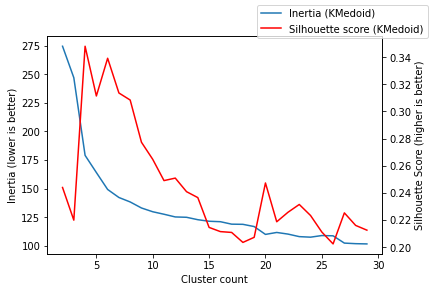

In [8]:
plt1 = result_pandas.plot(
    x="Cluster count", y="Inertia (KMedoid)", legend=False, ylabel="Inertia (lower is better)"
)
plt2 = result_pandas.plot(
    x="Cluster count",
    y="Silhouette score (KMedoid)",
    ax=plt1.twinx(),
    color="red",
    legend=False,
    ylabel="Silhouette Score (higher is better)",
)
plt1.figure.legend()

Result: the best result is achieved with cluster count of **2**. But, even with
a cluster count of 5, we get a silhouette score of **0.28**.

# Comparing with KMeans

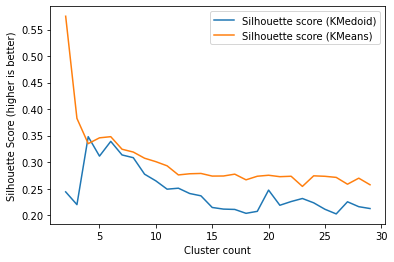

In [19]:
result_pandas.plot(
    x="Cluster count",
    y=["Silhouette score (KMedoid)", "Silhouette score (KMeans)"],
    ylabel="Silhouette Score (higher is better)",
).get_figure().savefig("kmedoid silhouette.svg", format="svg")


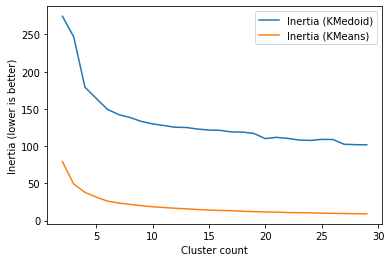

In [18]:
result_pandas.plot(
    x="Cluster count",
    y=["Inertia (KMedoid)", "Inertia (KMeans)"],
    ylabel="Inertia (lower is better)",
).get_figure().savefig("kmedoid inertia.svg", format="svg")

In [17]:
result_pandas.to_excel("kmedoid & kmeans clustering.xlsx")

# Finding adjusted rand score for KMedoid clustering

In [27]:
k_medoid = KMedoids(n_clusters=10)
k_medoid.fit(histograms)
prediction = k_medoid.predict(histograms)

In [22]:
true_labels = np.array([i for i in range(1000)]) // 100

In [26]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(true_labels, prediction)

0.22004420918128065